## 텍스트 분류

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)

2.3.1


In [2]:
imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 2s 0us/step


In [3]:
print("훈련 샘플: {}, 레이블: {}".format(len(train_data), len(train_labels)))

훈련 샘플: 25000, 레이블: 25000


In [4]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [5]:
len(train_data[0]), len(train_data[1])

(218, 189)

In [6]:
# 단어와 정수 인덱스를 매핑한 딕셔너리
word_index = imdb.get_word_index()

# 처음 몇 개 인덱스는 사전에 정의되어 있습니다
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

1646592/1641221 [==============================] - 0s 0us/step


In [9]:
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [10]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

In [11]:
len(train_data[0]), len(train_data[1])

(256, 256)

In [12]:
print(train_data[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

In [13]:
# 입력 크기는 영화 리뷰 데이터셋에 적용된 어휘 사전의 크기입니다(10,000개의 단어)
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16, input_shape=(None,)))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [15]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [16]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/40
30/30 [==============================] - 1s 26ms/step - loss: 0.6925 - accuracy: 0.5441 - val_loss: 0.6914 - val_accuracy: 0.6746
Epoch 2/40
30/30 [==============================] - 1s 20ms/step - loss: 0.6885 - accuracy: 0.7201 - val_loss: 0.6851 - val_accuracy: 0.6707
Epoch 3/40
30/30 [==============================] - 1s 19ms/step - loss: 0.6778 - accuracy: 0.7274 - val_loss: 0.6710 - val_accuracy: 0.7472
Epoch 4/40
30/30 [==============================] - 1s 20ms/step - loss: 0.6582 - accuracy: 0.7691 - val_loss: 0.6479 - val_accuracy: 0.7586
Epoch 5/40
30/30 [==============================] - 1s 19ms/step - loss: 0.6269 - accuracy: 0.7877 - val_loss: 0.6137 - val_accuracy: 0.7674
Epoch 6/40
30/30 [==============================] - 1s 19ms/step - loss: 0.5841 - accuracy: 0.8035 - val_loss: 0.5701 - val_accuracy: 0.7970
Epoch 7/40
30/30 [==============================] - 1s 19ms/step - loss: 0.5334 - accuracy: 0.8242 - val_loss: 0.5228 - val_accuracy: 0.8145
Epoch 8/40
30

In [17]:
# 모델 평가
results = model.evaluate(test_data,  test_labels, verbose=2)

print(results)

782/782 - 0s - loss: 0.3369 - accuracy: 0.8721
[0.3369385302066803, 0.8721200227737427]


In [18]:
# 정확도와 손실 그래프 그리기

history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

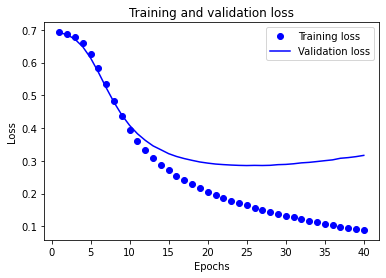

In [19]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

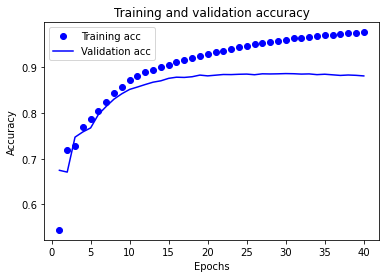

In [20]:
plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## kaggle 예제

In [51]:
import tensorflow as tf
import pandas as pd
import numpy as np

from tensorflow.keras.layers import Dense, Embedding, Bidirectional,LSTM,Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [52]:
train = pd.read_csv("../machine learning Practice/text_kaggle/train.csv")
test = pd.read_csv("../machine learning Practice/text_kaggle/test.csv")

In [53]:
train.shape, test.shape

((7613, 5), (3263, 4))

In [54]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [55]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [56]:
# 텍스트 값만 으로 타겟값 예측
# 라벨에 타켓값만 저장

labels = train.target
labels 

0       1
1       1
2       1
3       1
4       1
       ..
7608    1
7609    1
7610    1
7611    1
7612    1
Name: target, Length: 7613, dtype: int64

In [57]:
sentences = train.text
sentences

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 7613, dtype: object

In [58]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [59]:
# 불용어 제거 작업(remove stopwords)

from nltk.corpus import stopwords
sw = stopwords.words('english')
a = np.array(sw)

In [60]:
train["text"]

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 7613, dtype: object

In [61]:
# 제거 작업
def stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    return " ".join(text)
sentences = sentences.apply(stopwords)
sentences.head()

0        deeds reason #earthquake may allah forgive us
1               forest fire near la ronge sask. canada
2    residents asked 'shelter place' notified offic...
3    13,000 people receive #wildfires evacuation or...
4    got sent photo ruby #alaska smoke #wildfires p...
Name: text, dtype: object

In [62]:
# Train과 val나누기
from sklearn.model_selection import train_test_split
train_sentences, valid_sentences, train_labels, valid_labels = train_test_split(sentences, 
                                                                                labels,
                                                                               test_size=0.2,
                                                                               random_state=2020)

In [63]:
train_sentences.shape, valid_sentences.shape, train_labels.shape, valid_labels.shape

((6090,), (1523,), (6090,), (1523,))

In [64]:
# 토큰화
vocab_size = 1000
token = Tokenizer(num_words=vacab_size)
token.fit_on_texts(sentences)

In [65]:
print(train_sentences[:5])
train_sentences = token.texts_to_sequences(train_sentences)
valid_sentences = token.texts_to_sequences(valid_sentences) # 숫자값으로 만듬
print(train_sentences[:5])

6477               still sunk i've actually met idol ????
2524    times desolation trouble daniel's persistent p...
439        @casper_rmg @bestcomedyvine whats cracking cuz
1824                    @olliebailey11 havnt crashed ? ??
4386    remove http://t.co/7ieiz619h0 linkury browser ...
Name: text, dtype: object
[[24, 373, 267, 557], [178, 398, 447, 388, 133, 3, 1, 2], [], [330], [3, 1, 2, 451, 3, 1, 2, 3, 1, 2]]


In [66]:
# 패딩

trunc_type = "post" # 뒤부분 잘라내거나 모자라면 0으로 채움 
padding_type = "post"
max_length = 120

train_pad = pad_sequences(train_sentences, truncating=trunc_type, 
                          padding=padding_type, maxlen=max_length)
valid_pad = pad_sequences(valid_sentences, truncating=trunc_type, 
                          padding=padding_type, maxlen=max_length)


In [67]:
# 모델
train_labels = np.asarray(train_labels)
valid_labels = np.asarray(valid_labels)

In [68]:
embedding_dim = 64
model = tf.keras.Sequential([
    Embedding(vocab_size, embedding_dim),
    Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    Bidirectional(tf.keras.layers.LSTM(32)),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [69]:
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          64000     
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         66048     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 175,489
Trainable params: 175,489
Non-trainable params: 0
__________________________________________________

In [71]:
model.fit(train_pad, train_labels, validation_data=(valid_pad, valid_labels),
         epochs=3, verbose=2)

Epoch 1/3
191/191 - 26s - loss: 0.4256 - accuracy: 0.8159 - val_loss: 0.4457 - val_accuracy: 0.7919
Epoch 2/3
191/191 - 23s - loss: 0.3962 - accuracy: 0.8320 - val_loss: 0.4517 - val_accuracy: 0.7997
Epoch 3/3
191/191 - 23s - loss: 0.3824 - accuracy: 0.8355 - val_loss: 0.4555 - val_accuracy: 0.7984


In [74]:
# Test데이터 전처리 및 예측

test_sequences = test.text
test_sequences = test_sequences.apply(stopwords)
test_sequences = token.texts_to_sequences(test_sequences)
test_pad = pad_sequences(test_sequences, truncating=trunc_type,
                         padding=padding_type, maxlen=max_length)

In [75]:
y_pred = model.predict(test_pad)

In [76]:
sub_file = pd.DataFrame()
sub_file['id'] = test['id']
sub_file['target'] = y_pred.round().astype(int)
sub_file.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,0
4,11,1


In [ ]:
# 제출
sub_file.to_csv('submission_lstn.csv',index=False)